In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accidents = pd.read_csv("data/accidents.csv")
df = pd.DataFrame(accidents)
df["DAY"] = df["day_of_week"].apply(lambda x: "weekend" 
                                    if x in ["Saturday", "Sunday"] 
                                    else "weekday")
df = df.assign(hours   = lambda d: d.time.str.split(":").str[0],
               minutes = lambda d: d.time.str.split(":").str[1],
               seconds = lambda d: d.time.str.split(":").str[2])

In [5]:
#include time variable into new variable in seconds
df['hours'] = pd.to_numeric(df['hours'], errors='coerce')
df['minutes'] = pd.to_numeric(df['minutes'], errors='coerce')
df['seconds'] = pd.to_numeric(df['seconds'], errors='coerce')

df['Time of day'] = df['hours']*60*60 + df['minutes']*60 + df['seconds']

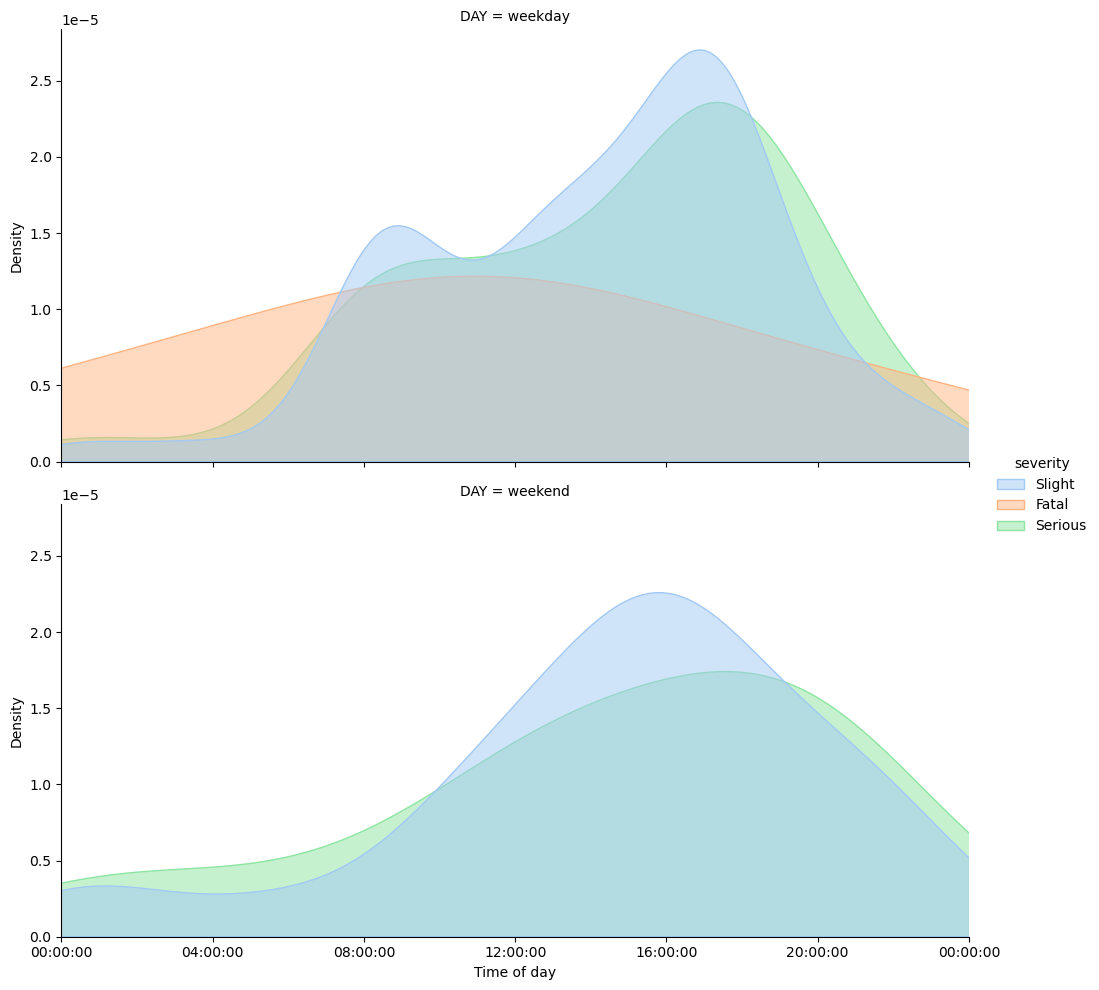

In [6]:

sns.displot(
  data = df,
  x = "Time of day", hue = "severity", common_norm = False,
  kind = "kde", 
    fill=True,
  alpha = 0.5, aspect = 2,
    row = 'DAY', 
    palette = "pastel"
)

plt.xlim(0,86400)
plt.xticks([0,          14400,      28800,      43200,     57600,       72000,     86400], 
           ['00:00:00', '04:00:00', '08:00:00', '12:00:00','16:00:00', '20:00:00', '00:00:00'])

plt.show()